In [351]:
import numpy as np

In [352]:
# https://web.eecs.umich.edu/~justincj/teaching/eecs442/notes/linear-backprop.html

In [353]:
class Linear:
    def __init__(self, num_in, num_out, use_bias = True) -> None:
        self.use_bias = use_bias
        self.num_in = num_in
        self.num_out = num_out
        self.matr = np.random.normal(0, 1., (num_in + (1 if use_bias else 0), num_out))
        self.grads = np.zeros_like(self.matr)
        self.last_xs = None

    def get_grad(self, upstream_resp_loss: np.ndarray) -> np.ndarray:
        # divvy up the blame!
        # except now, just do it with the last inputs

        # the loss 'attributed' that we will pass up, (the loss 'attributed' to inputs) is proportonial to the weight mat
        if not self.use_bias:
            dloss_din = upstream_resp_loss @ np.sign(self.matr.T)
        else:
            # chop off the bias!
            dloss_din = upstream_resp_loss @ np.sign(self.matr[:-1, :].T)

        # the loss 'attributed' to the weights is directly proportional to the inputs we recieved
        dloss_dweights = self.last_xs.T @ upstream_resp_loss

        assert self.grads.shape == dloss_dweights.shape
        self.grads = np.sign(dloss_dweights)

        return np.sign(dloss_din)

    def forward(self, xs: np.ndarray, no_record: bool = False) -> np.ndarray:
        # fix xs, if we need bias
        fixed_xs = xs
        if self.use_bias:
            fixed_xs = np.hstack((fixed_xs, np.ones((fixed_xs.shape[0], 1))))
        
        if not no_record:
            self.last_xs = fixed_xs
        
        return fixed_xs @ np.sign(self.matr)

In [354]:
class LinearPercepFused(Linear):
    def forward(self, xs: np.ndarray, no_record: bool = False) -> np.ndarray:
        outp = super().forward(xs, no_record)
        return np.where(outp > 0., 1., 0.)

In [355]:
class MSELoss:
    def __init__(self) -> None:
        self.last_diffs = None

    def get_grad(self) -> np.ndarray:
        return np.sign(self.last_diffs) * (np.abs(self.last_diffs) > .1)
        # return 2.*self.last_diffs/len(self.last_diffs)

    def forward(self, y: np.ndarray, y_exp) -> np.ndarray:
        self.last_diffs = y - y_exp
        return np.mean(self.last_diffs**2)

In [356]:
# xs = np.linspace(-10, 10, 1000)
# ys = xs*10 + 2
# xs += np.random.normal(0.,.1, len(xs))

# xs = xs.reshape(-1, 1)
# ys = ys.reshape(-1, 1)

xs = np.array([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
ys = np.array([[0.], [0.], [0.], [1.]])
# ys = np.array([[0.], [1.], [1.], [0.]])
# ys = np.array([[0.], [0.], [1.], [0.]])


In [357]:
xs_repeat = xs.repeat(10, 0)
ys_repeat = ys.repeat(10, 0)
ys_repeat += np.random.normal(0, .01, size=ys_repeat.shape)

In [358]:
import matplotlib.pyplot as plt

In [359]:
LR = .01

In [360]:
from tqdm import tqdm

In [361]:
def get_random_range(lenx, seq_len):
    start_i = np.random.randint(0, lenx-seq_len)
    return start_i, start_i + seq_len

In [362]:
def shuffle(arrs):
    for arr in arrs:
        assert len(arr) == len(arrs[0]), "All arrays should be the same length"
    idxs = np.arange(0, len(arr))
    np.random.shuffle(idxs)
    reindexed = [arr[idxs] for arr in arrs]
    return reindexed

In [363]:
get_random_range(len(xs_repeat), 10)

(27, 37)

In [364]:
xs_repeat_shuff, ys_repeat_shuff = shuffle([xs_repeat, ys_repeat])

 93%|█████████▎| 2804/3000 [00:00<00:00, 9486.89it/s]

loss=0.9835455969222425
pass_back_grad=array([[1.]])
pass_back_grad=array([[-1., -1.,  1.,  1., -1.]])
pass_back_grad=array([[-1.,  1.]])
loss=0.9972671375738368
pass_back_grad=array([[1.]])
pass_back_grad=array([[-1., -1.,  1.,  1., -1.]])
pass_back_grad=array([[-1.,  1.]])
loss=3.368575366257905e-05
pass_back_grad=array([[-0.]])
pass_back_grad=array([[0., 0., 0., 0., 0.]])
pass_back_grad=array([[0., 0.]])
loss=1.0106405356704382
pass_back_grad=array([[1.]])
pass_back_grad=array([[-1., -1.,  1.,  1., -1.]])
pass_back_grad=array([[-1.,  1.]])
loss=0.9928229125534104
pass_back_grad=array([[1.]])
pass_back_grad=array([[-1., -1.,  1.,  1., -1.]])
pass_back_grad=array([[-1.,  1.]])
loss=0.9714236247272161
pass_back_grad=array([[1.]])
pass_back_grad=array([[-1., -1.,  1.,  1., -1.]])
pass_back_grad=array([[-1.,  1.]])
loss=0.9879012448125473
pass_back_grad=array([[1.]])
pass_back_grad=array([[-1., -1.,  1.,  1., -1.]])
pass_back_grad=array([[-1.,  1.]])
loss=0.00013313021613550025
pass_back

100%|██████████| 3000/3000 [00:00<00:00, 9303.83it/s]

loss=0.00015263902834876587
pass_back_grad=array([[-0.]])
pass_back_grad=array([[0., 0., 0., 0., 0.]])
pass_back_grad=array([[0., 0.]])
loss=6.824951215170759e-05
pass_back_grad=array([[-0.]])
pass_back_grad=array([[0., 0., 0., 0., 0.]])
pass_back_grad=array([[0., 0.]])
loss=1.8696899367072185e-06
pass_back_grad=array([[-0.]])
pass_back_grad=array([[0., 0., 0., 0., 0.]])
pass_back_grad=array([[0., 0.]])
loss=3.368575366257905e-05
pass_back_grad=array([[-0.]])
pass_back_grad=array([[0., 0., 0., 0., 0.]])
pass_back_grad=array([[0., 0.]])
loss=0.00029488593235951814
pass_back_grad=array([[-0.]])
pass_back_grad=array([[0., 0., 0., 0., 0.]])
pass_back_grad=array([[0., 0.]])
loss=0.00029488593235951814
pass_back_grad=array([[-0.]])
pass_back_grad=array([[0., 0., 0., 0., 0.]])
pass_back_grad=array([[0., 0.]])
loss=2.774822487829443e-06
pass_back_grad=array([[-0.]])
pass_back_grad=array([[0., 0., 0., 0., 0.]])
pass_back_grad=array([[0., 0.]])
loss=0.0004866037346303749
pass_back_grad=array([[-

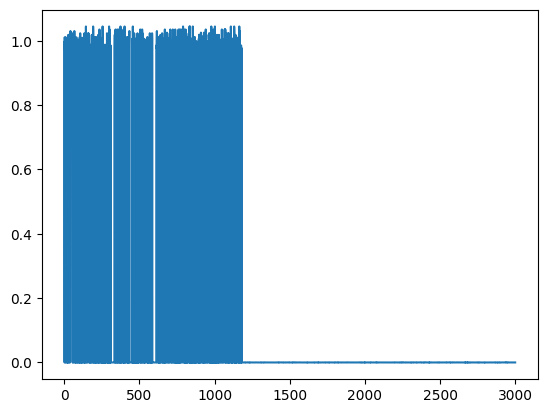

In [365]:
lin1 = LinearPercepFused(2, 5, use_bias=True)
lin2 = LinearPercepFused(5, 1, use_bias=True)
lossf = MSELoss()

losses = []
for _ in tqdm(range(3000)):
    starti, endi = get_random_range(len(xs_repeat_shuff), 1)
    out_l1 = lin1.forward(xs_repeat_shuff[starti:endi])
    out = lin2.forward(out_l1)

    loss = lossf.forward(out, ys_repeat_shuff[starti:endi])
    print(f"{loss=}")
    
    pass_back_grad = lossf.get_grad()
    print(f"{pass_back_grad=}")
    pass_back_grad = lin2.get_grad(pass_back_grad)
    print(f"{pass_back_grad=}")
    pass_back_grad = lin1.get_grad(pass_back_grad)
    print(f"{pass_back_grad=}")

    lin1.matr += lin1.grads*-LR
    lin2.matr += lin2.grads*-LR
    losses.append(loss)
import matplotlib.pyplot as plt
plt.plot(losses)

In [366]:
out_l1 = lin1.forward(xs, True)
out = lin2.forward(out_l1, True)
out

array([[0.],
       [0.],
       [0.],
       [1.]])

In [367]:
np.sign(lin1.matr)

array([[-1., -1.,  1.,  1., -1.],
       [-1., -1.,  1.,  1., -1.],
       [-1., -1., -1., -1., -1.]])

In [368]:
np.sign(lin2.matr)

array([[-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.]])

In [369]:
sxs, sys = np.meshgrid(*[np.linspace(-2, 2, 202) for _ in range(2)])

In [370]:
pts = np.vstack([sxs.ravel(), sys.ravel()]).T

In [371]:
import matplotlib.pyplot as plt

In [372]:
out_l1 = lin1.forward(pts, True)
out = lin2.forward(out_l1, True)
out

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [373]:
print(f"{out.min()=}, {out.max()=}")

out.min()=0.0, out.max()=1.0


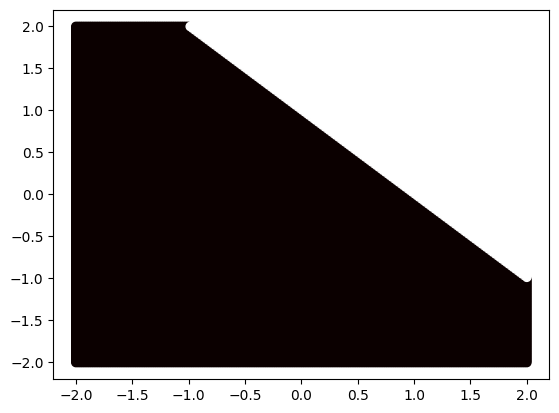

In [374]:
plt.scatter(pts[:, 0], pts[:, 1], c=out, cmap="hot")